#Imported all the libraries at once

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error as mae


In [68]:
from google.colab import files
uploaded = files.upload()            # This function was used to bring the required file



Saving Height-weight.csv.csv to Height-weight.csv (2).csv


In [69]:
import pandas as pd
df = pd.read_csv("Height-weight.csv.csv").iloc[:100]       #Locked the data from 0 to 99 from dataframe

In [70]:
df.head()            # saw the 5 headlines of thedataframe


,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [71]:
df.shape      # Shape= (Row , Column)

(100, 2)

In [72]:
df.tail()  # Last 5 head lines of dataframe

,Height,Weight
95,65.117485,165.717112
96,71.701234,193.094164
97,66.832878,180.683887
98,66.471275,172.773723
99,69.411526,177.470616


In [73]:
df.columns      # see the actual column name written in the dataframe

Index(['Height', 'Weight'], dtype='object')

In [74]:
df.isna().sum()             #Check whether there are null values and get the sum of those values

,0
Height,0
Weight,0


In [75]:
df.describe()            # get the mathematical values of the dataframe

,Height,Weight
count,100.000000,100.000000
mean,69.050776,186.847260
std,2.600337,19.301889
min,63.456494,149.173566
25%,67.238143,172.627025
50%,68.924121,186.209063
75%,71.200518,198.313516
max,75.205974,241.893563


In [76]:
df.shape          # Size of row and column

(100, 2)

In [77]:
plt.figure(figsize=(4,5))         # First draw of the actual data( Still we are far from actual prediction and testing)

<Figure size 400x500 with 0 Axes>

<Figure size 400x500 with 0 Axes>

Text(0.5, 1.0, 'Relation between height and weight')

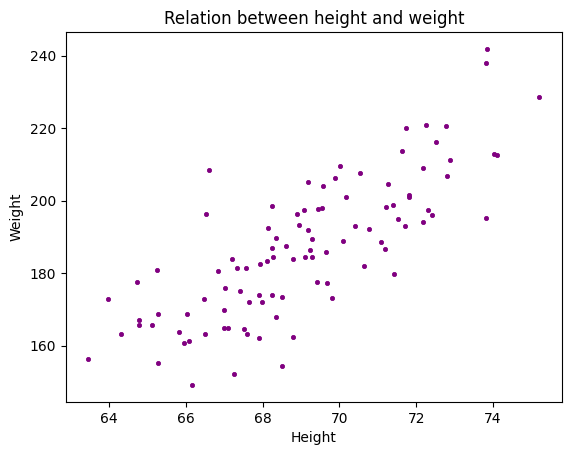

In [78]:
plt.scatter(df["Height"],df["Weight"], color="purple", marker=".",linewidths= .60)   # This line of code creates a scatter plot using matplotlib, where height is plotted on the x-axis and weight on the y-axis.
plt.xlabel("Height")                # These lines are for aligning axis name and other attributes to the matplotlib
plt.ylabel("Weight")
plt.title("Relation between height and weight")


In [79]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [80]:
x=df[["Height"]]    # Extracts the "Height" and ""Weight" column but keeps it as a DataFrame (not a Series)
y=df[["Weight"]]    #Double brackets ([["Height"]]) ensure the output remains 2D (needed for machine learning models like scikit-learn).



In [92]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y, train_size=.7,random_state=42)

#This line of code splits the dataset into training and testing sets using train_test_split from sklearn.model_selection

In [93]:
xtrain.head() # Now see the headlines from the training dataframe.

,Height
11,71.640805
47,72.172709
85,71.079018
28,67.421242
93,64.731926


In [94]:
ytrain.head()  # Y values of training dataframe

,Weight
11,213.741170
47,209.070863
85,188.602919
28,175.213922
93,177.549263


In [95]:
xtest.tail()        # see x test set
ytest.tail()       #See output test dataset of  x values

,Weight
15,172.186930
40,172.135597
96,193.094164
9,156.399676
72,177.200929


In [96]:
xtrain.shape  # Row and column size of training data

(70, 1)

In [97]:
ytrain.shape

(70, 1)

In [98]:
LR=LinearRegression()  # We called the LinearRegression() from scikitlearn

In [99]:
LR

LinearRegression()

In [100]:
LR.fit(xtrain,ytrain) # We fitted the training data to the model

LinearRegression()

In [103]:
LR.score(xtrain, ytrain) # We found out the score of training data

0.5802425782522969

In [104]:
LR.score(xtest, ytest)   # We found out the score of test data

0.6852787202776363

In [18]:
LR.predict([[73.847017]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[214.59770118]])

In [21]:
df["predict1"] = LR.predict(df[["Height"]])  # We assigned a prediction column to see the model prediction

In [ ]:
df.head()

,Height,Weight,predit1
0,73.847017,241.893563,214.597701
1,68.781904,162.310473,185.634792
2,74.110105,212.740856,216.102071
3,71.730978,220.042470,202.497945
4,69.881796,206.349801,191.924102


In [23]:
df["Error"]=df["Weight"]-df["predict1"] # We also assigned a Error column to see the errors

In [24]:
df

,Height,Weight,predict1,Error
0,73.847017,241.893563,214.597701,27.295862
1,68.781904,162.310473,185.634792,-23.324319
2,74.110105,212.740856,216.102071,-3.361216
3,71.730978,220.042470,202.497945,17.544526
4,69.881796,206.349801,191.924102,14.425698
...,...,...,...,...
95,65.117485,165.717112,164.681214,1.035898
96,71.701234,193.094164,202.327863,-9.233699
97,66.832878,180.683887,174.490034,6.193853
98,66.471275,172.773723,172.422346,0.351377


In [35]:
Pred=LR.predict(xtest) # Now we test our 30 % test data

In [36]:
Pred

array([[170.58029261],
       [160.03068625],
       [198.76995618],
       [174.49003377],
       [172.58402344],
       [187.91207235],
       [178.7458896 ],
       [188.50051807],
       [208.61555864],
       [202.32786269],
       [178.36373399],
       [182.60380318],
       [199.55280125],
       [222.36837429],
       [187.91033702],
       [169.4963996 ],
       [216.10207141],
       [182.73163186],
       [175.42783095],
       [187.31744575]])

Text(0.5, 1.0, 'Test result of Height-Weight')

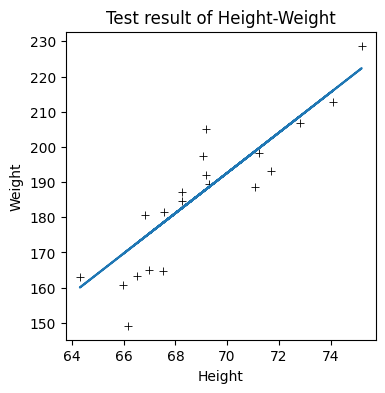

In [39]:
plt.figure(figsize=(4,4))
plt.scatter(xtest, ytest, color="black", marker= "+", linewidths=.60)
plt.plot(xtest, LR.predict(xtest))
plt.xlabel("Height")               # Scatterplot for test data
plt.ylabel("Weight")
plt.title("Test result of Height-Weight")

Text(0.5, 1.0, 'Trained result of Height-Weight')

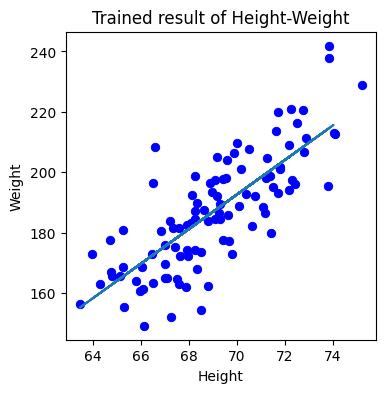

In [43]:
plt.figure(figsize=(4,4))
plt.scatter(df["Height"], df["Weight"], color="blue",marker="o",linewidths=.7)
plt.plot(xtrain, LR.predict(xtrain))
plt.xlabel("Height")                  # Scatter plot for training data
plt.ylabel("Weight")
plt.title("Trained result of Height-Weight")


In [52]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [53]:
MSE= mse(xtest, ytest) #Finding the mean squared error value

In [54]:
MSE

13876.664936954166

In [55]:
MAE = mae(xtest,ytest)   #Finding the mean absolute error value
MAE

116.537291753

In [56]:
m= LR.coef_   # The coefficient of the best fit line
c=LR.intercept_  #The y-intercept of the Best fit line

In [57]:
c

array([-207.66819421])

In [58]:
m

array([[5.71811716]])

In [59]:
y= m * 73.847017 + c  #The equation for Best fit line

In [60]:
y

array([[214.59770118]])